<a href="https://colab.research.google.com/github/humairarizqi/Machine_Learning_Practice/blob/main/SC62621_Humaira_Rizqi_Tridianti_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 3 (MACHINE LEARNING)

Berdasarkan dataset yang telah kalian pilih pada Assignment 2:
1. Peserta mampu melakukan determinasi machine learning model mana yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.
2. Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.
3. Peserta dapat melakukan eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.
4. Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.
5. Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4.
6. Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.
7. Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.
8. Peserta mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.
9. Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.
10. Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9

## Data Preprocessing

### Input Data

In [ ]:
import pandas as pd
data = pd.read_csv("https://docs.google.com/spreadsheets/d/1ncf4KMRuQ_ilZRtixB1ExGyB0xJtFW-H/export?format=csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Handling Missing Value

In [ ]:
# Mencari Missing Value
missing_values = data.isnull().sum()

# Output missing values untuk setiap kolom
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Handling Duplicate Data

In [ ]:
#Menghapus Nilai Duplikat
data = data.drop_duplicates()
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


### Handling Outlier Data

age            Axes(0.125,0.11;0.110714x0.77)
trestbps    Axes(0.257857,0.11;0.110714x0.77)
chol        Axes(0.390714,0.11;0.110714x0.77)
thalach     Axes(0.523571,0.11;0.110714x0.77)
oldpeak     Axes(0.656429,0.11;0.110714x0.77)
ca          Axes(0.789286,0.11;0.110714x0.77)
dtype: object

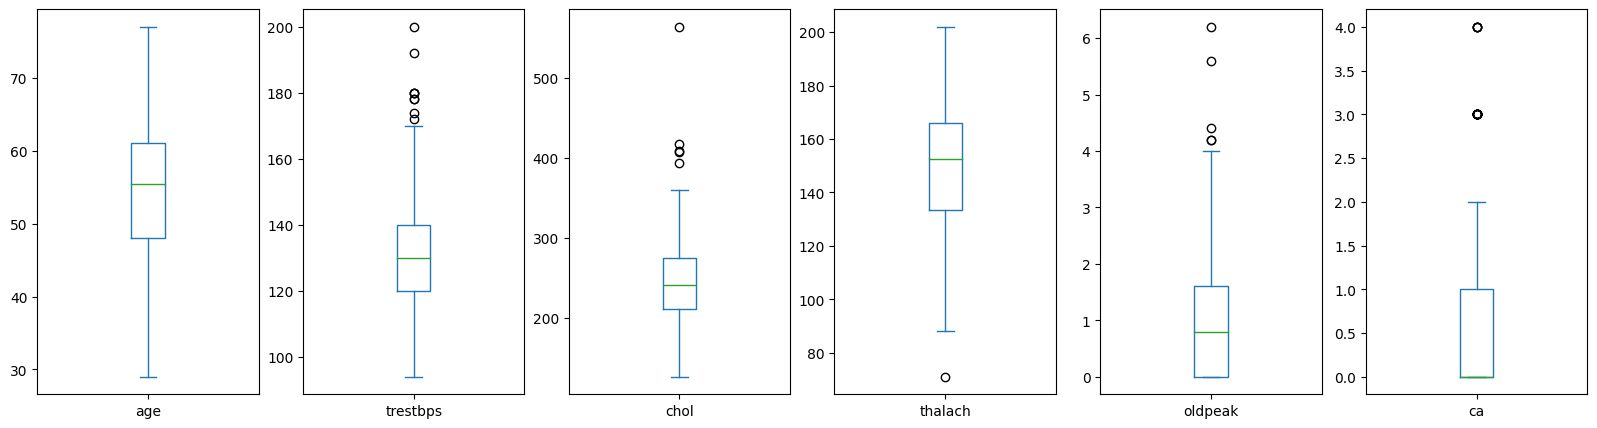

In [ ]:
# Menampilkan Outlier pada Data Numerik
data[['age','trestbps','chol','thalach','oldpeak','ca']].plot(kind='box', subplots=True, figsize=(20,5))

age            Axes(0.125,0.11;0.110714x0.77)
trestbps    Axes(0.257857,0.11;0.110714x0.77)
chol        Axes(0.390714,0.11;0.110714x0.77)
thalach     Axes(0.523571,0.11;0.110714x0.77)
oldpeak     Axes(0.656429,0.11;0.110714x0.77)
ca          Axes(0.789286,0.11;0.110714x0.77)
dtype: object

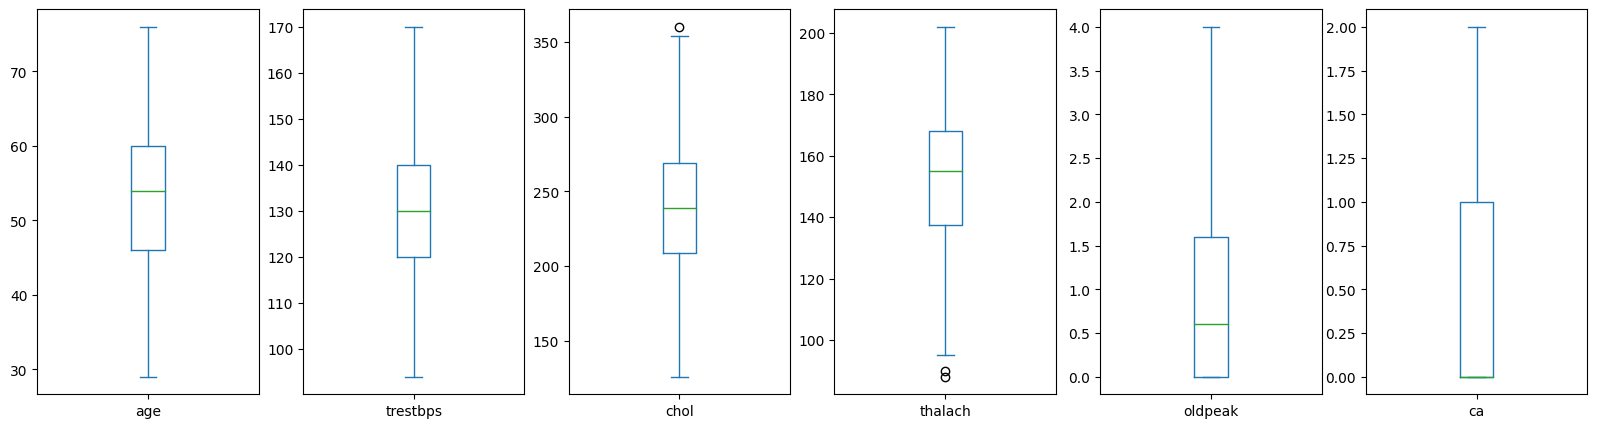

In [ ]:
#Mengahapus Data Outlier
P25 = data[['age','trestbps','chol','thalach','oldpeak','ca']].quantile(0.25)
P75 = data[['age','trestbps','chol','thalach','oldpeak','ca']].quantile(0.75)

# Menghitung rentang IQR
IQR = P75 - P25

# Menetapkan batas bawah dan batas atas
lower_bound = P25 - 1.5 * IQR
upper_bound = P75 + 1.5 * IQR

# Menghapus outlier
data_clean = data[((data[['age','trestbps','chol','thalach','oldpeak','ca']] >= lower_bound) & (data[['age','trestbps','chol','thalach','oldpeak','ca']] <= upper_bound)).all(axis='columns')]

# Menampilkan Boxplot yang Outliernya sudah dihapus
data_clean[['age','trestbps','chol','thalach','oldpeak','ca']].plot(kind='box', subplots=True, figsize=(20,5))

### Handling Error Data

In [ ]:
# CEK ERROR VALUES DATA CATEGORICAL
data_clean[['sex','cp','restecg','exang','slope','thal','target']].astype(object).describe()

,sex,cp,restecg,exang,slope,thal,target
count,263,263,263,263,263,263,263
unique,2,4,3,2,3,4,2
top,1,0,1,0,2,2,1
freq,180,119,136,180,130,151,152


Kolom 'thal' memiliki 4 unique values, di mana seharusnya hanya ada 3, yaitu 1,2,3. Berikut adalah nilai 'thal' selain 1,2,3

In [ ]:
true_values=[1,2,3]
data_clean[~data_clean['thal'].isin(true_values)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1


In [ ]:
#Menghapus data yang salah
true_values=[1,2,3]
data_clean = data_clean[data_clean['thal'].isin(true_values)]
data_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


## Feature Engineering

### Menambah Fitur Rasio Kolesterol Total terhadap Tekanan Darah Istirahat (Cholesterol-to-Blood Pressure Ratio)

Rasio ini dapat memberikan indikasi tentang hubungan antara kolesterol dan tekanan darah terhadap risiko penyakit jantung.

In [ ]:
# Menambah Fitur Baru
data_clean['Chol-to-BP_Ratio'] = data_clean['chol'] / data_clean['trestbps']
data_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Chol-to-BP_Ratio
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,2.480000


### Menambah Fitur Rasio Denyut Jantung Maksimum terhadap Tekanan Darah Istirahat (Max Heart Rate-to-Resting Blood Pressure Ratio)

Rasio ini dapat memberikan indikasi tentang respons jantung terhadap tekanan darah istirahat dan dapat menjadi prediktor risiko penyakit jantung.

In [ ]:
# Menambah Fitur Baru
data_clean['MaxHeartRate-to-BP_Ratio'] = data_clean['thalach'] / data_clean['trestbps']
data_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Chol-to-BP_Ratio,MaxHeartRate-to-BP_Ratio
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,1.344000
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,1.107143
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,0.862069
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,1.087838
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,2.480000,1.220000


### Menambah Fitur Heart Pluse Score

In [ ]:
# Menambah Fitur Baru
data_clean['Heart_Pulse_Score'] = data_clean['thalach'] + data_clean['trestbps']
data_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Chol-to-BP_Ratio,MaxHeartRate-to-BP_Ratio,Heart_Pulse_Score
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.696000,1.344000,293
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1.450000,1.107143,295
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,1.200000,0.862069,270
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,1.371622,1.087838,309
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1,2.480000,1.220000,222


### Encoding Categorical Data

In [ ]:
# Buat Variabel Berdasarkan Jenis Data
num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
cat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']

# Menghapus Data Kategorikal yang sudah Biner
cat.remove('sex')
cat.remove('target')
cat.remove('exang')

# Encoding
data_encoding=pd.get_dummies(data_clean, columns = cat, dtype=int)

# Menampilkan DataFrame
data_encoding.head()

,age,sex,trestbps,chol,thalach,exang,oldpeak,ca,target,Chol-to-BP_Ratio,...,fbs_1,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_1,thal_2,thal_3
0,52,1,125,212,168,0,1.0,2,0,1.696000,...,0,0,1,0,0,0,1,0,0,1
1,53,1,140,203,155,1,3.1,0,0,1.450000,...,1,1,0,0,1,0,0,0,0,1
2,70,1,145,174,125,1,2.6,0,0,1.200000,...,0,0,1,0,1,0,0,0,0,1
3,61,1,148,203,161,0,0.0,1,0,1.371622,...,0,0,1,0,0,0,1,0,0,1
5,58,0,100,248,122,0,1.0,0,1,2.480000,...,0,1,0,0,0,1,0,0,1,0


## Feature Selection

### 1. Heat Map Correlation

<Axes: >

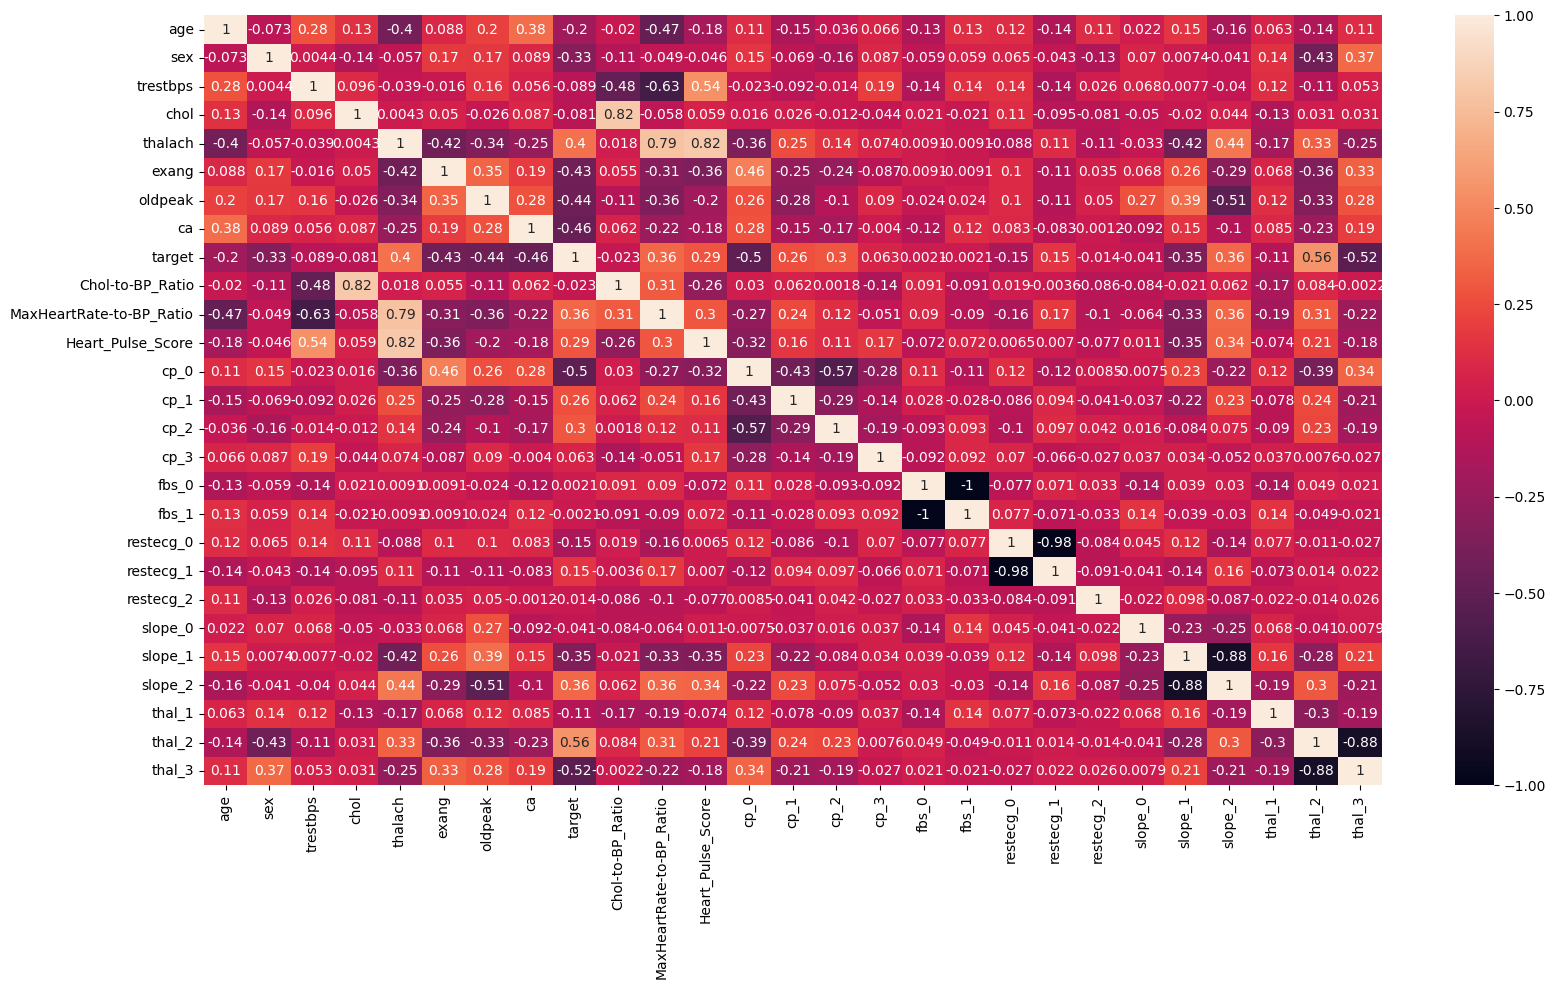

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
from seaborn import heatmap

# Menampilkan correlation heatmap
plt.figure(figsize=(19,10))
heatmap(data_encoding.corr(numeric_only=False), annot=True)

### Mengahapus Fitur yang Memiliki nilai korelasi mendekati negatif 1 dan positif 1

In [ ]:
data_encoding = data_encoding.drop(['restecg_0', 'slope_2','fbs_0','thal_2','thalach','chol'], axis=1)
data_encoding.head()

,age,sex,trestbps,exang,oldpeak,ca,target,Chol-to-BP_Ratio,MaxHeartRate-to-BP_Ratio,Heart_Pulse_Score,...,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slope_0,slope_1,thal_1,thal_3
0,52,1,125,0,1.0,2,0,1.696000,1.344000,293,...,0,0,0,0,1,0,0,0,0,1
1,53,1,140,1,3.1,0,0,1.450000,1.107143,295,...,0,0,0,1,0,0,1,0,0,1
2,70,1,145,1,2.6,0,0,1.200000,0.862069,270,...,0,0,0,0,1,0,1,0,0,1
3,61,1,148,0,0.0,1,0,1.371622,1.087838,309,...,0,0,0,0,1,0,0,0,0,1
5,58,0,100,0,1.0,0,1,2.480000,1.220000,222,...,0,0,0,0,0,0,0,1,0,0


## Base Model

### Split Data

In [ ]:
# Import Library
from sklearn.model_selection import train_test_split

# Split Data
x = data_encoding.drop('target', axis='columns')
y = data_encoding['target']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

### Model 1: KNN

In [ ]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Training model
model_knn = KNeighborsClassifier().fit(x_train, y_train)


# Prediksi model
target_predict_knn = model_knn.predict(x_test)

# Classification report
print(classification_report(y_test, target_predict_knn))
accuracy_score(y_test,target_predict_knn)

              precision    recall  f1-score   support

           0       0.62      0.50      0.55        26
           1       0.59      0.70      0.64        27

    accuracy                           0.60        53
   macro avg       0.61      0.60      0.60        53
weighted avg       0.61      0.60      0.60        53



0.6037735849056604

#### Confusion Matrix

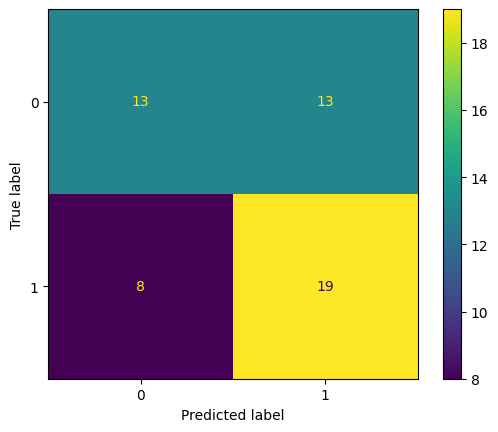

In [ ]:
# Import libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
matrix_knn = confusion_matrix(y_test, target_predict_knn)
ConfusionMatrixDisplay(matrix_knn).plot()
plt.show()

*   Model KNN ini memprediksi 32 (19+13) data dengan benar dan 21 (8+13) data dengan salah
*   True Positive (aktual +, prediksi +)=19
*   True Negative (aktual -, prediksi -)=13
*   False Positive (aktual -, prediksi +)=13
*   False Negative (aktual +, prediksi -)=8

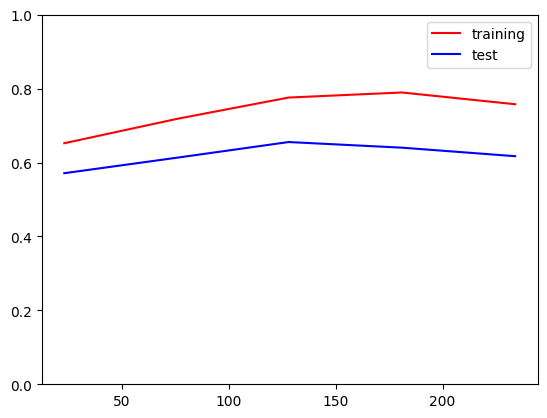

In [ ]:
# Import libraries
from sklearn.model_selection import learning_curve
from matplotlib import pyplot
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt

# K-folds
k_folds = KFold(n_splits = 10)

# Learning curve
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(model_knn, x, y, cv = k_folds)
pyplot.plot(train_sizes_knn, train_scores_knn.mean(axis = 1), color='r', label='training')
pyplot.plot(train_sizes_knn, test_scores_knn.mean(axis = 1), color='b', label='test')
pyplot.legend()
pyplot.ylim(0,1)
plt.show()

### Model 2: Regresi Logistik

In [ ]:
# Import Libraries
from sklearn.linear_model import LogisticRegression

# Train Model
log = LogisticRegression()
model_logres=log.fit(x_train,y_train)

# Prediksi
y_pred = model_logres.predict(x_test)

# Classification report
print(classification_report(y_test, y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.79      0.96      0.87        27

    accuracy                           0.85        53
   macro avg       0.87      0.85      0.85        53
weighted avg       0.87      0.85      0.85        53



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8490566037735849

#### Confusion Matrix

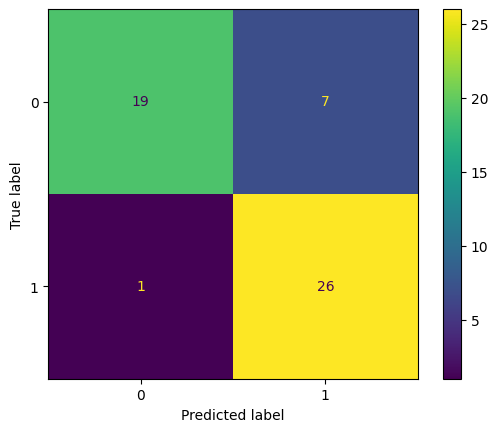

In [ ]:
# Confusion matrix
matrix_logres = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(matrix_logres).plot()
plt.show()

*   Model Regresi Logistik ini memprediksi 45 (26+19) data dengan benar dan 8 (1+7) data dengan salah
*   True Positive (aktual +, prediksi +)=26
*   True Negative (aktual -, prediksi -)=19
*   False Positive (aktual -, prediksi +)=7
*   False Negative (aktual +, prediksi -)=1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

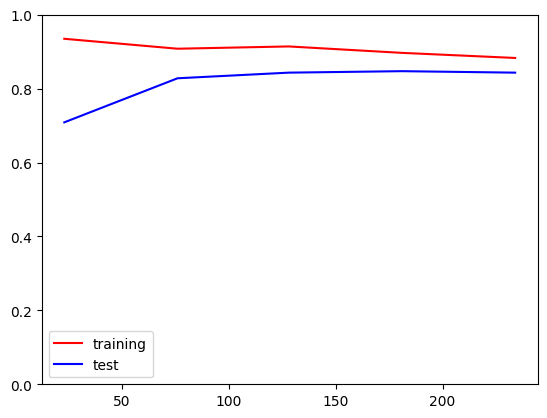

In [ ]:
# Learning curve
train_sizes_logres, train_scores_logres, test_scores_logres = learning_curve(model_logres, x, y, cv = k_folds)
pyplot.plot(train_sizes_logres, train_scores_logres.mean(axis = 1), color='r', label='training')
pyplot.plot(train_sizes_logres, test_scores_logres.mean(axis = 1), color='b', label='test')
pyplot.legend()
pyplot.ylim(0,1)
plt.show()

### Model 3: SVM

In [ ]:
# Import libraries
from sklearn.svm import SVC

# Training model
model_svm = SVC().fit(x_train, y_train)

# Prediksi model
target_predict_svm = model_svm.predict(x_test)

# Classification report
print(classification_report(y_test, target_predict_svm))
accuracy_score(y_test,target_predict_svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.51      1.00      0.67        27

    accuracy                           0.51        53
   macro avg       0.25      0.50      0.34        53
weighted avg       0.26      0.51      0.34        53



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5094339622641509

### Confusion Matrix

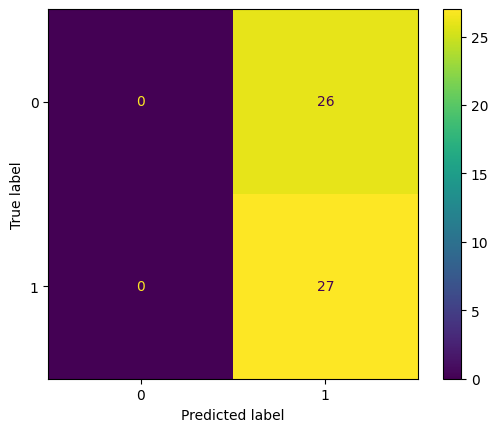

In [ ]:
matrix_svm = confusion_matrix(y_test, target_predict_svm)
ConfusionMatrixDisplay(matrix_svm).plot()
plt.show()

*   Model SVM ini memprediksi 27 data dengan benar dan 26 data dengan salah
*   True Positive (aktual +, prediksi +)=27
*   True Negative (aktual -, prediksi -)=0
*   False Positive (aktual -, prediksi +)=26
*   False Negative (aktual +, prediksi -)=0

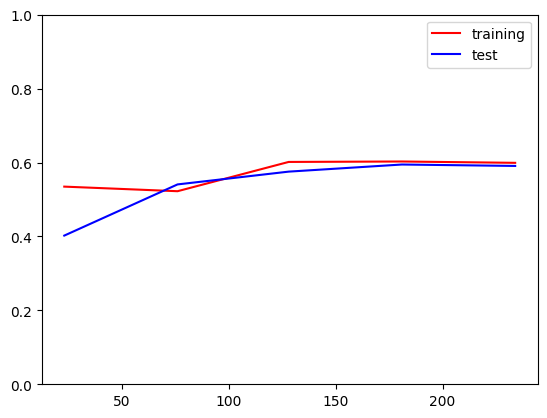

In [ ]:

# Learning curve
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(model_svm, x, y, cv = k_folds)
pyplot.plot(train_sizes_svm, train_scores_svm.mean(axis = 1), color='r', label='training')
pyplot.plot(train_sizes_svm, test_scores_svm.mean(axis = 1), color='b', label='test')
pyplot.legend()
pyplot.ylim(0,1)
plt.show()

### Model 4: RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Buat Random Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train Model
model_rfc=rf_classifier.fit(x_train, y_train)

# Prediksi Model
y_pred1 = model_rfc.predict(x_test)

# Classification Report
classification_rep = classification_report(y_test, y_pred1)
# Print the results
print("\nClassification Report:\n", classification_rep)
accuracy_score(y_test,y_pred1)


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.58      0.70        26
           1       0.69      0.93      0.79        27

    accuracy                           0.75        53
   macro avg       0.79      0.75      0.75        53
weighted avg       0.79      0.75      0.75        53



0.7547169811320755

### Confusion Matrix

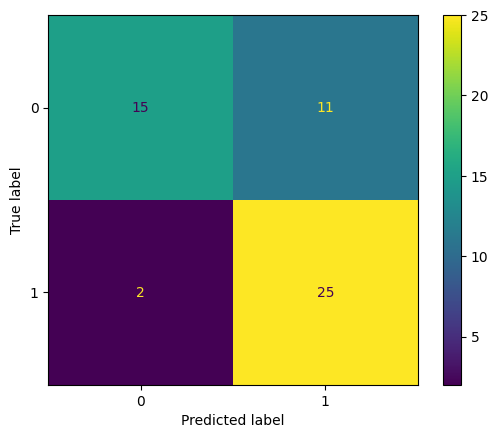

In [ ]:
matrix_rfc = confusion_matrix(y_test, y_pred1)
ConfusionMatrixDisplay(matrix_rfc).plot()
plt.show()

*   Model RandomForestClassifier ini memprediksi 40 (25+15) data dengan benar dan 13 (2+11) data dengan salah
*   True Positive (aktual +, prediksi +)=25
*   True Negative (aktual -, prediksi -)=15
*   False Positive (aktual -, prediksi +)=11
*   False Negative (aktual +, prediksi -)=2

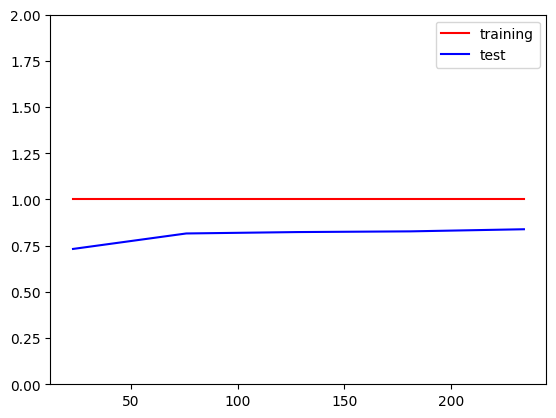

In [ ]:
# Learning curve
train_sizes_rfc, train_scores_rfc, test_scores_rfc = learning_curve(model_rfc, x, y, cv = k_folds)
pyplot.plot(train_sizes_rfc, train_scores_rfc.mean(axis = 1), color='r', label='training')
pyplot.plot(train_sizes_rfc, test_scores_rfc.mean(axis = 1), color='b', label='test')
pyplot.legend()
pyplot.ylim(0,2)
plt.show()

### Compare Model

In [ ]:
# Import libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Report compirason
metrics_knn = [
    accuracy_score(y_test, target_predict_knn),
    precision_score(y_test, target_predict_knn),
    recall_score(y_test, target_predict_knn),
    f1_score(y_test, target_predict_knn)
]
metrics_svm = [
    accuracy_score(y_test, target_predict_svm),
    precision_score(y_test, target_predict_svm),
    recall_score(y_test, target_predict_svm),
    f1_score(y_test, target_predict_svm)
]
metrics_logres = [
    accuracy_score(y_test,y_pred),
    precision_score(y_test,y_pred),
    recall_score(y_test,y_pred),
    f1_score(y_test,y_pred)
]
metrics_randomforest = [
    accuracy_score(y_test,y_pred1),
    precision_score(y_test,y_pred1),
    recall_score(y_test,y_pred1),
    f1_score(y_test,y_pred1)
]
display(pd.DataFrame(
    [metrics_knn, metrics_svm, metrics_logres, metrics_randomforest ],
    index=['KNN', 'SVM', 'Logistic Regression','RandomForest' ],
    columns=['accuracy_score', 'precision_score', 'recall_score', 'f1_score']
))

,accuracy_score,precision_score,recall_score,f1_score
KNN,0.603774,0.593750,0.703704,0.644068
SVM,0.509434,0.509434,1.000000,0.675000
Logistic Regression,0.849057,0.787879,0.962963,0.866667
RandomForest,0.754717,0.694444,0.925926,0.793651


Berdasarkan tingkat akurasinya, dipilih model Logistic Regression karena memperlihatkan tingkat akurasi paling tinggi, taitu 0,849 atau sekitar 85%